In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
df = pd.read_csv('cars.csv')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,26.0,4,97,46,1835,21,1971,Europe.
1,26.0,4,97,46,1950,21,1974,Europe.
2,43.1,4,90,48,1985,22,1979,Europe.
3,43.4,4,90,48,2335,24,1981,Europe.
4,44.3,4,90,48,2085,22,1981,Europe.


In [26]:
df.corr()

/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_3910/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776710,-0.803370,-0.774905,-0.821471,0.509070,0.550441
cylinders,-0.776710,1.000000,0.951471,0.845155,0.893582,-0.578161,-0.322239
cubicinches,-0.803370,0.951471,1.000000,0.905766,0.926024,-0.608839,-0.349126
hp,-0.774905,0.845155,0.905766,1.000000,0.860330,-0.744873,-0.383869
weightlbs,-0.821471,0.893582,0.926024,0.860330,1.000000,-0.486429,-0.280629
time-to-60,0.509070,-0.578161,-0.608839,-0.744873,-0.486429,1.000000,0.312311
year,0.550441,-0.322239,-0.349126,-0.383869,-0.280629,0.312311,1.000000


In [29]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,26.0,4,97,46,1835,21,1971,Europe.
1,26.0,4,97,46,1950,21,1974,Europe.
2,43.1,4,90,48,1985,22,1979,Europe.
3,43.4,4,90,48,2335,24,1981,Europe.
4,44.3,4,90,48,2085,22,1981,Europe.


In [31]:
X = df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]

# input dimentions = 6
# Dimensionality reduction for visualization (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [33]:
pd.DataFrame(X_pca, columns = ['pc1','pc2'])

,pc1,pc2
0,-1174.484013,28.354859
1,-1060.380686,14.035240
2,-1026.524868,3.332632
3,-679.259433,-40.320274
4,-927.313564,-9.145374
...,...,...
256,1374.031100,105.913777
257,1966.708575,34.081451
258,116.236966,266.297176
259,1444.796570,99.566998


In [12]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

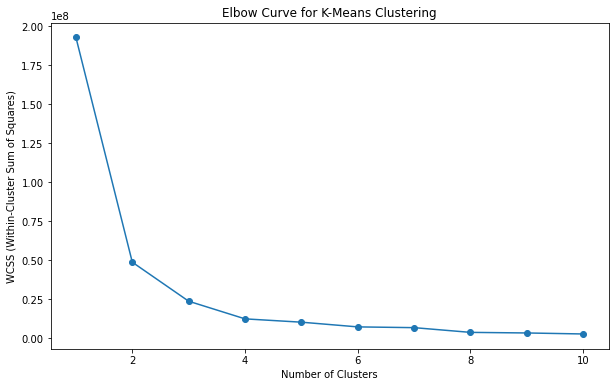

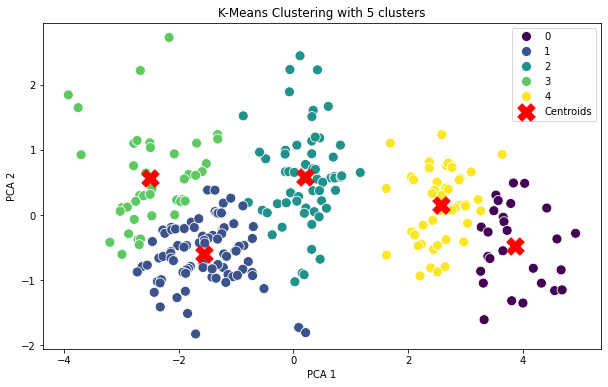

In [42]:
# Data preprocessing
# For clustering, we will use the 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction for visualization (PCA to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# scaler = StandardScaler()
# X_pca = scaler.fit_transform(X)

# Function to plot clusters
def plot_clusters(X, labels, centers=None, title='Clustering'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', legend='full', s=100)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids', marker='X')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.show()

# 1. K-Means Clustering with Elbow Curve
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster centers

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Plot K-Means Clustering results
optimal_clusters = 5  # You can set this based on the elbow curve observation
kmeans = KMeans(n_clusters=optimal_clusters, random_state=4)
kmeans_labels = kmeans.fit_predict(X_pca)
plot_clusters(X_pca, kmeans_labels, kmeans.cluster_centers_, title=f'K-Means Clustering with {optimal_clusters} clusters')


In [45]:
X['labels'] = kmeans_labels

/var/folders/n3/pxxd36b52x11p_lp7pqzq5vw0000gn/T/ipykernel_3910/2871195638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = kmeans_labels


In [46]:
X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,labels
0,26.0,4,97,46,1835,21,3
1,26.0,4,97,46,1950,21,3
2,43.1,4,90,48,1985,22,3
3,43.4,4,90,48,2335,24,3
4,44.3,4,90,48,2085,22,3
...,...,...,...,...,...,...,...
256,14.0,8,454,220,4354,9,0
257,12.0,8,455,225,4951,11,0
258,14.0,8,455,225,3086,10,0
259,14.0,8,455,225,4425,10,0


In [24]:
# print center of clusters
centers = kmeans.cluster_centers_
pd.DataFrame(centers, columns = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60'])

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60
0,0.321316,-0.852408,-0.741399,-0.414563,-0.627041,-0.007660
1,-0.970493,1.370385,1.137813,0.979673,1.162715,-0.755566
2,1.371289,-0.888682,-0.949283,-1.021031,-1.035158,0.934673
3,-0.492386,0.270976,0.188361,-0.208761,0.261573,0.466109
4,-1.192471,1.393053,1.845976,2.134091,1.469774,-1.579859


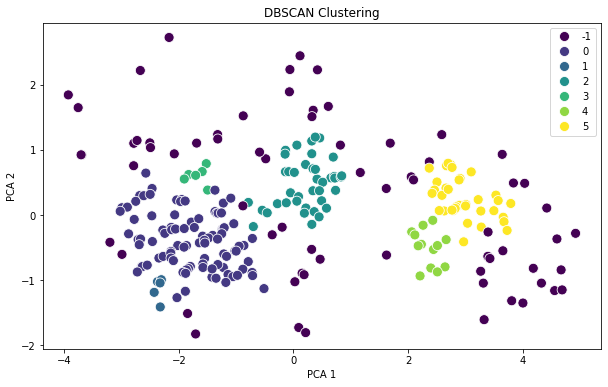

In [15]:
# 2. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)
plot_clusters(X_pca, dbscan_labels, title='DBSCAN Clustering')


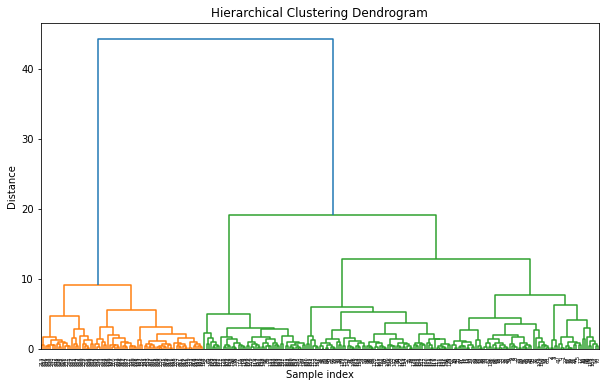

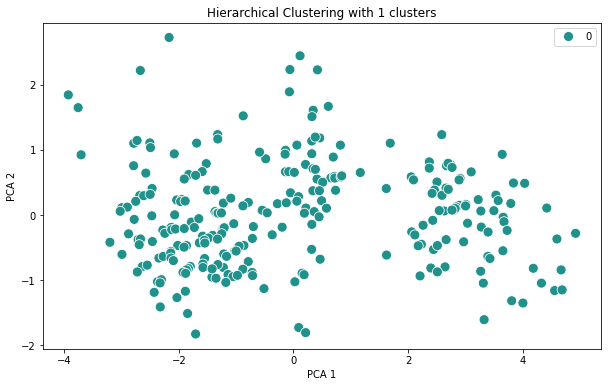

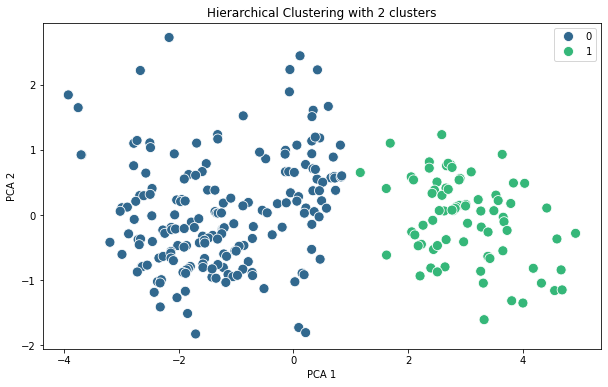

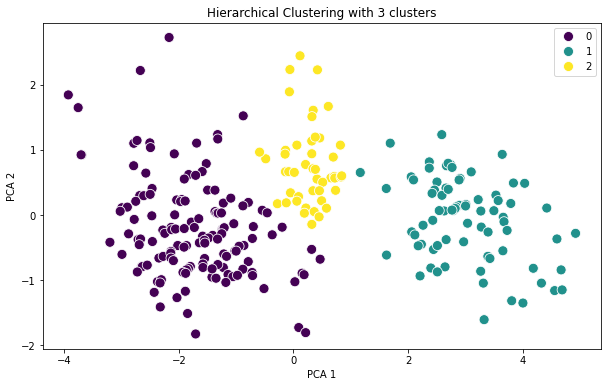

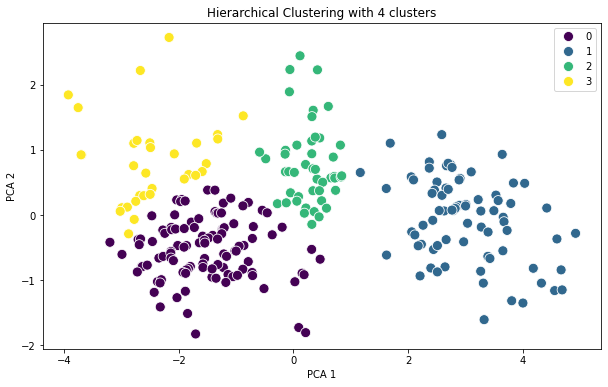

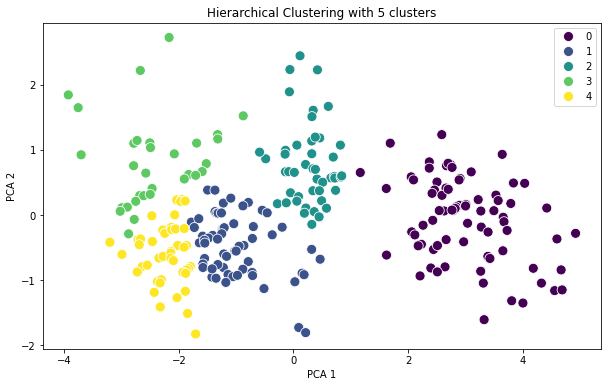

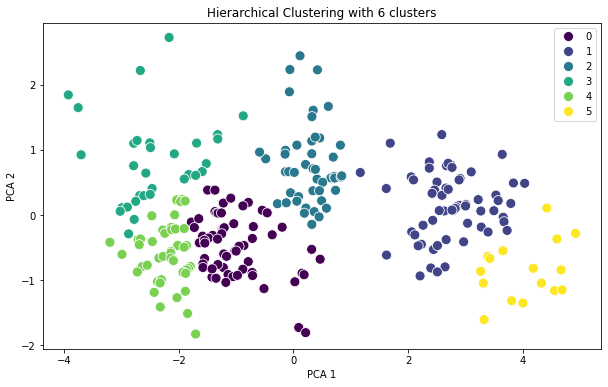

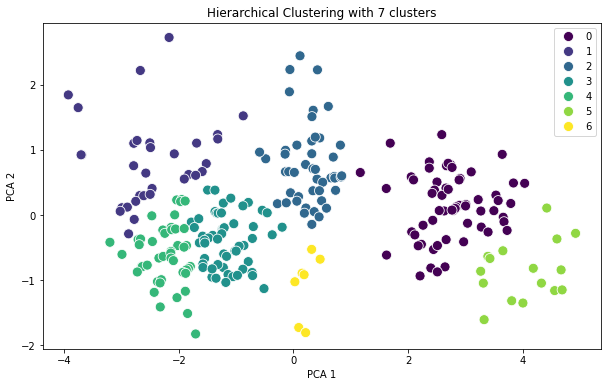

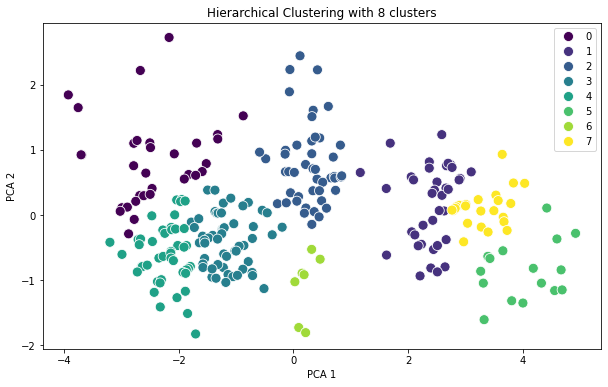

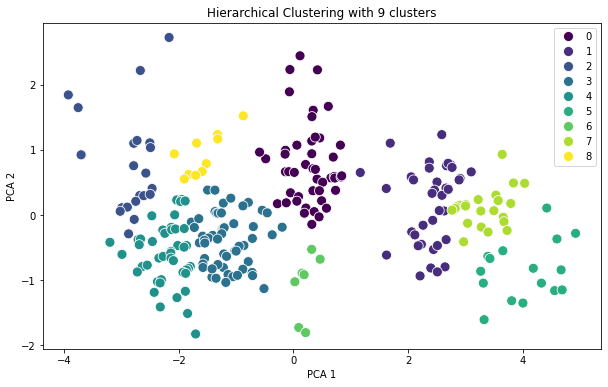

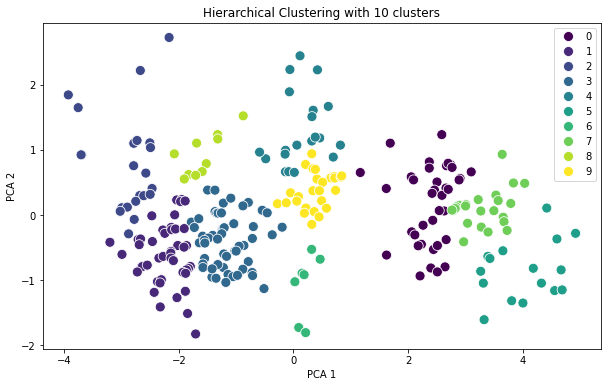

In [17]:
# 4. Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 3. Hierarchical Clustering (Agglomerative)
for n_clusters in range(1, 11):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(X_pca)
    plot_clusters(X_pca, hierarchical_labels, title=f'Hierarchical Clustering with {n_clusters} clusters')



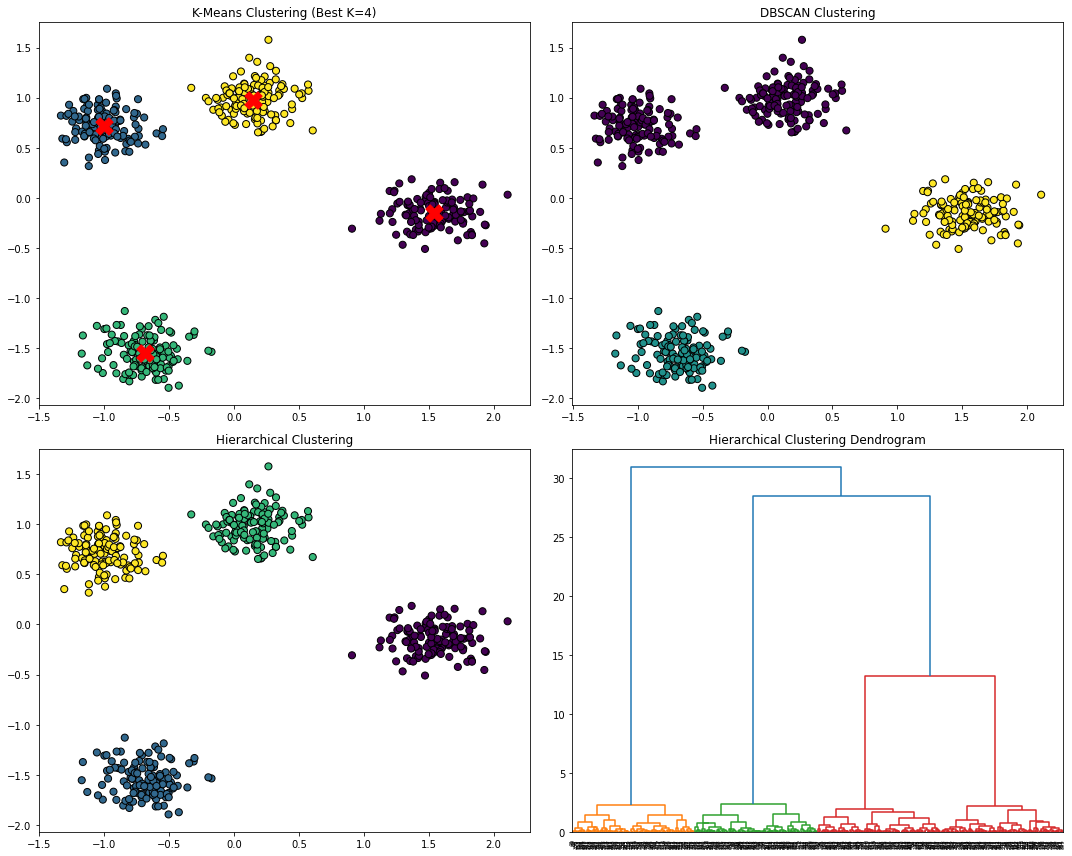

Best K for K-Means: 4
Best Silhouette Score for K-Means: 0.7979185955370356


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Pick a dataset suitable for clustering
# Using a synthetic dataset with blobs for clustering
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Perform Data Processing
# Standardize the dataset for better performance of clustering algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Clustering with K-Means, DBSCAN, and Hierarchical Clustering
clusters_range = range(1, 11)

kmeans_scores = []
kmeans_models = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    if k > 1:  # Avoid silhouette score for k=1
        score = silhouette_score(X_scaled, kmeans.labels_)
        kmeans_scores.append(score)
    kmeans_models.append(kmeans)

# DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Step 4: Draw Visualizations
plt.figure(figsize=(15, 12))

# K-Means Clustering
plt.subplot(2, 2, 1)
best_k = kmeans_models[np.argmax(kmeans_scores) + 1]
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_k.labels_, cmap='viridis', s=50, marker='o', edgecolor='k')
plt.scatter(best_k.cluster_centers_[:, 0], best_k.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-Means Clustering (Best K={})'.format(np.argmax(kmeans_scores) + 2))

# DBSCAN Clustering
plt.subplot(2, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')

# Hierarchical Clustering
plt.subplot(2, 2, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis', s=50, marker='o', edgecolor='k')
plt.title('Hierarchical Clustering')

# Hierarchical Dendrogram
plt.subplot(2, 2, 4)
Z = linkage(X_scaled, 'ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()

# Step 5: Print the best K for K-Means and Silhouette Score
print("Best K for K-Means:", np.argmax(kmeans_scores) + 2)
print("Best Silhouette Score for K-Means:", max(kmeans_scores))
